In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [5]:
# ensemble learning is better than having just one method



# Voting Classifiers

In [6]:
heads_proba=0.51
coin_tosses = (np.random.rand(10000,10)<heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses,axis=0)/np.arange(1,10001).reshape(-1,1)


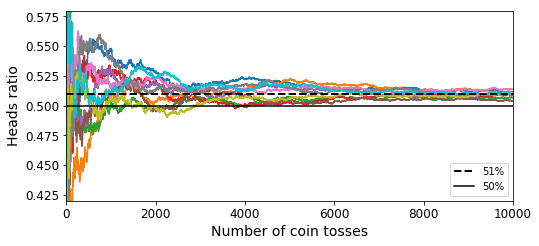

In [8]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000],[0.51,0.51],"k--",linewidth=2 ,label="51%")
plt.plot([0,10000],[0.5,0.5],"k-",label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0,10000,0.42,0.58])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X , y = make_moons(n_samples=500 , noise=0.30 , random_state=42)
X_train , X_test , y_train , y_test = train_test_split( X,y ,random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
        estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')

In [11]:
voting_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)

In [14]:
from sklearn.metrics import accuracy_score

for clf in (log_clf , rnd_clf , svm_clf , voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
        
        

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


C:\Users\Boston\Anaconda3a\lib\site-packages\sklearn\preprocessing\label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
# as we can see the VotingClassifier slightly outperforms the voting classifier

In [16]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True , random_state=42)

voting_clf  = VotingClassifier(
        estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='soft')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='soft', weights=None)

In [18]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


C:\Users\Boston\Anaconda3a\lib\site-packages\sklearn\preprocessing\label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging ensembles 

In [19]:
# using a training algoritm for every predictor on random subsets of the training data with
#replacement is called bagging and without replacement is called sampling 

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=42),n_estimators=500,
        max_samples=100 , bootstrap=True , n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.904


In [22]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_tree))

0.856


In [24]:
from matplotlib.colors import ListedColormap # leave that for later 

# Out of bag evaluation

In [25]:
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(),n_estimators=500,
        bootstrap=True,n_jobs=-1,oob_score=True)

In [26]:
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.896

In [27]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

In [28]:
bag_clf.oob_decision_function_

array([[0.42857143, 0.57142857],
       [0.40782123, 0.59217877],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06217617, 0.93782383],
       [0.36871508, 0.63128492],
       [0.00534759, 0.99465241],
       [0.99408284, 0.00591716],
       [0.96685083, 0.03314917],
       [0.77005348, 0.22994652],
       [0.01098901, 0.98901099],
       [0.82446809, 0.17553191],
       [0.81443299, 0.18556701],
       [0.95906433, 0.04093567],
       [0.05434783, 0.94565217],
       [0.00561798, 0.99438202],
       [0.98984772, 0.01015228],
       [0.96      , 0.04      ],
       [0.98989899, 0.01010101],
       [0.01117318, 0.98882682],
       [0.33507853, 0.66492147],
       [0.91160221, 0.08839779],
       [1.        , 0.        ],
       [0.97740113, 0.02259887],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65608466, 0.34391534],
       [0.

# bagging

In [29]:
# sampling both features and training instance = random batches 
# sampling features alone is called random subspaces


from sklearn.datasets import fetch_mldata

# Random forests

In [31]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred_rf  =  rnd_clf.predict(X_test)


In [34]:
# Equivalence of Bagging classifier  and RandomForestClassifer

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(splitter="random",max_leaf_nodes=16),
        n_estimators=500,max_samples=1.0,bootstrap=True,n_jobs=-1)

In [35]:
# abit about extra trees - more can and faster than random forest because uses arbritrary 
# thresholds ( and finding thresholds can be time consuming)



# Feature Importance 

In [36]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')


In [38]:
rnd_clf =RandomForestClassifier(random_state=42)
rnd_clf.fit(mnist["data"],mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [39]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=matplotlib.cm.hot,
                           interpolation="nearest")
    plt.axis("off")
    
    

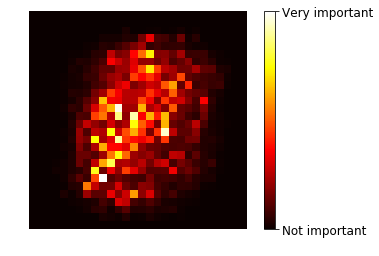

In [40]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important','Very important'])

plt.show()

# AdaBoost


In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),n_estimators=200,
        algorithm="SAMME.R",learning_rate=0.5)
ada_clf.fit(X_train,y_train)

#tweaks instance weights from the predecessor

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [45]:
# Gradient boosting works by  improving the meansquare error

In [52]:
np.random.seed(42)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2 + 0.05*np.random.randn(100)

In [53]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1= DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [54]:
# now train a second decision tree regressoor on the residual errors made by the first
#predictor

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [55]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [56]:
X_new = np.array([[0.8]])

In [57]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))

In [58]:
y_pred

array([0.75026781])

In [59]:
# simpler way to do ensemble learning

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [65]:
# graphs need to be drawn

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train , X_val , y_train , y_val = train_test_split( X , y , random_state=42)
gbrt.fit(X_train,y_train)

errors = [mean_squared_error(y_val,y_pred)
                 for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators=np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators,random_state=42)
gbrt_best.fit(X_train,y_train)




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=2, presort='auto',
             random_state=42, subsample=1.0, verbose=0, warm_start=False)

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2,n_estimator=120)
gbrt.fit(X_train,y_train)

In [67]:
gbrt = GradientBoostingRegressor(max_depth=2,warm_start=True)

min_val_error = float("inf")
error_going_up=0
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train,y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val,y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up=0
    else:
        error_going_up +=1
        if error_going_up ==5:
            break

# Stacking

In [68]:
# tbh dont really know what that is